### Importing libraries

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc = {'figure.figsize':(12,8)}) #Seaborn settings for plotting
sns.set_style("darkgrid")


# Exercise 1

In [2]:

def generate_stripe_image(size, stripe_nr, vertical = True):
    img=np.zeros((size,size,1),dtype="uint8")
    for i in range(0,stripe_nr):
        x,y = np.random.randint(0,size,2)
        l  = np.int(np.random.randint(y,size,1))
    if (vertical):
        img[y:l,x,0]=255
    else:
        img[x,y:l,0]=255
    return img  

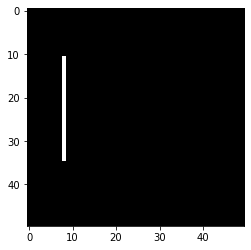

In [3]:
import numpy as np

img=generate_stripe_image(50,10, vertical=True)
plt.imshow(img[:,:,0],cmap='gray')


In [16]:
#Generate training and testing dataset
X_train=[]
X_val=[]
Y_train=[]
Y_val=[]
for i in range(500):
    #Generate training vertical stripes
    X_train.append(generate_stripe_image(50,10, vertical=True))
    Y_train.append(0)
    #Generate training horizontal stripes
    X_train.append(generate_stripe_image(50,10, vertical=False))
    Y_train.append(1)
    #Generate testing vertical stripes
    X_val.append(generate_stripe_image(50,10, vertical=True))
    Y_val.append(0)
    #Generate testing horizontal stripes
    X_val.append(generate_stripe_image(50,10, vertical=False))
    Y_val.append(1)
    
X_train=np.array(X_train)
X_val=np.array(X_val)
Y_train=np.array(Y_train)
Y_val=np.array(Y_val)

In [17]:
#Normalize data so that 255 (white) is 1
X_train[np.where(X_train==255)]=1
X_val[np.where(X_val==255)]=1

In [18]:
import tensorflow as tf 
#Convert labels to categorical
Y_train = tf.keras.utils.to_categorical(Y_train,num_classes=2)
Y_val = tf.keras.utils.to_categorical(Y_val,num_classes=2)

In [19]:
#Build CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,5,activation="linear",input_shape=(50,50,1),padding="same"))
model.add(tf.keras.layers.MaxPool2D(50))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2,activation="softmax"))
#Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 1)         26        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


The model has 30 parameters.

In [21]:
history=model.fit(X_train, Y_train,
validation_data=(X_val,Y_val),
batch_size=64,
epochs=50,
verbose=1,
shuffle=True)

Epoch 1/50
16/16 [==============================] - 1s 64ms/step - loss: 0.8265 - accuracy: 0.4859 - val_loss: 0.7824 - val_accuracy: 0.4940
Epoch 2/50
16/16 [==============================] - 1s 37ms/step - loss: 0.7722 - accuracy: 0.5036 - val_loss: 0.7524 - val_accuracy: 0.4940
Epoch 3/50
16/16 [==============================] - 1s 37ms/step - loss: 0.7449 - accuracy: 0.5012 - val_loss: 0.7260 - val_accuracy: 0.4940
Epoch 4/50
16/16 [==============================] - 1s 38ms/step - loss: 0.7123 - accuracy: 0.5210 - val_loss: 0.7032 - val_accuracy: 0.4940
Epoch 5/50
16/16 [==============================] - 1s 38ms/step - loss: 0.7042 - accuracy: 0.4892 - val_loss: 0.6830 - val_accuracy: 0.4940
Epoch 6/50
16/16 [==============================] - 1s 40ms/step - loss: 0.6587 - accuracy: 0.5353 - val_loss: 0.6647 - val_accuracy: 0.4940
Epoch 7/50
16/16 [==============================] - 1s 38ms/step - loss: 0.6678 - accuracy: 0.4845 - val_loss: 0.6478 - val_accuracy: 0.4940
Epoch 8/50
16

In [40]:
#Reformatting data for plotting purposes using seaborn
history_df = pd.DataFrame(history.history)
history_df['Epoch']=history_df.index+1
loss_df=pd.melt(history_df[['loss','Epoch','val_loss']],id_vars='Epoch',value_name='Loss')
accuracy_df=pd.melt(history_df[['accuracy','Epoch','val_accuracy']],id_vars='Epoch',value_name='Accuracy')

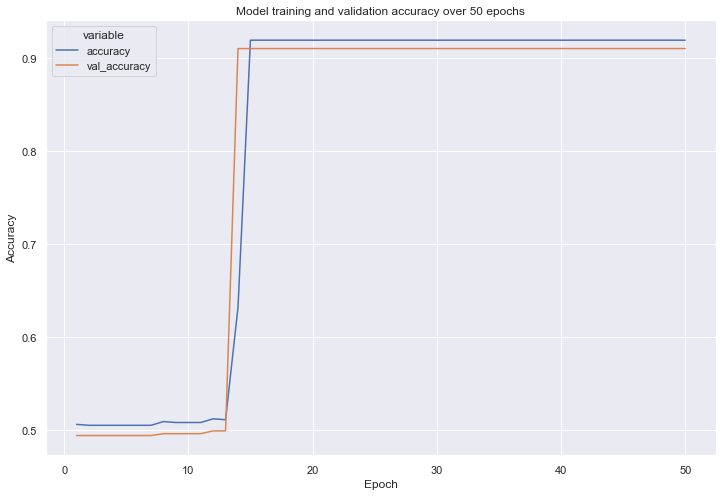

In [46]:
p=sns.lineplot(data=accuracy_df,x='Epoch',y='Accuracy',hue='variable')
_=p.set(title="Model training and validation accuracy over 50 epochs")

The above plot shows the training and validation accuracy for the model over the course of 50 epochs.The validation accuracy gets highter than the training accuracy after the 13th epoch, after which the model's training accuracy overtakes the validation accuracy.

<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

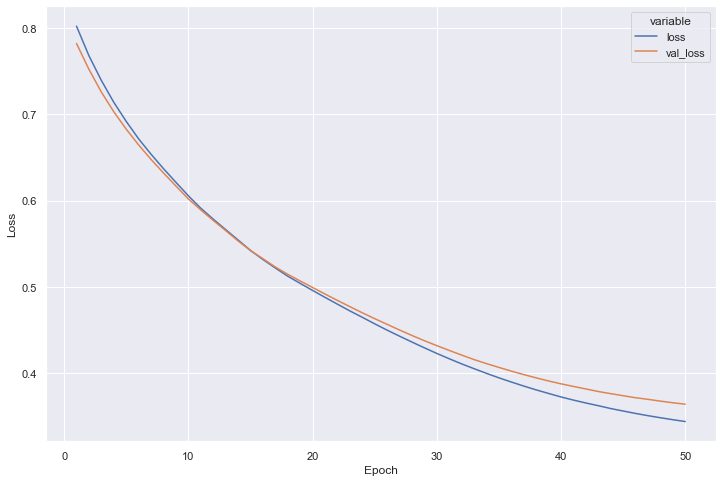

In [43]:
sns.lineplot(data=loss_df,x='Epoch',y='Loss',hue='variable')

The above plot shows the training and validation loss for the model over the course of 50 epochs.

In [48]:
model.

In [47]:
my_kernel=model.get_weights()[0].squeeze()

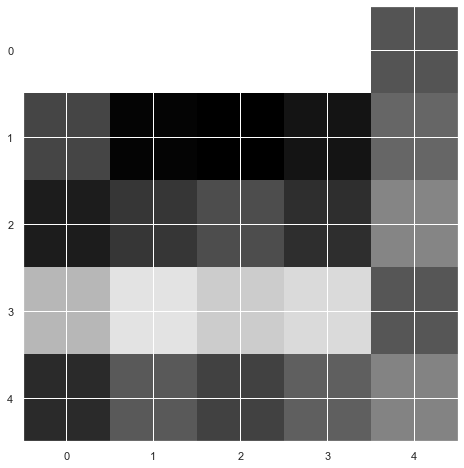

In [60]:
plt.imshow(my_kernel,cmap="gray")

This convolution contains 2 strong white vertical lines that would increase the signal of white vertical lines after being applied to the image. As a result, images with vertical lines would show a strong signal and images with horizontal lines would show weaker signals. The following neural network layers would the be able to discern from signal strength whether an image has a vertical or horizontal line, and based on this kernel it seams reasonable that the model would be able to distinguish between horizontal and vertical lines.

In [49]:
#Build CNN model
reLu_model = tf.keras.Sequential()
reLu_model.add(tf.keras.layers.Conv2D(1,5,activation="relu",input_shape=(50,50,1),padding="same"))
reLu_model.add(tf.keras.layers.MaxPool2D(50))
reLu_model.add(tf.keras.layers.Flatten())
reLu_model.add(tf.keras.layers.Dense(2,activation="softmax"))
#Compile model
reLu_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
reLu_history=reLu_model.fit(X_train, Y_train,
validation_data=(X_val,Y_val),
batch_size=64,
epochs=50,
verbose=1,
shuffle=True)

Epoch 1/50
16/16 [==============================] - 1s 42ms/step - loss: 0.6801 - accuracy: 0.4950 - val_loss: 0.6772 - val_accuracy: 0.5060
Epoch 2/50
16/16 [==============================] - 1s 43ms/step - loss: 0.6742 - accuracy: 0.4950 - val_loss: 0.6707 - val_accuracy: 0.5060
Epoch 3/50
16/16 [==============================] - 1s 41ms/step - loss: 0.6672 - accuracy: 0.4950 - val_loss: 0.6631 - val_accuracy: 0.5060
Epoch 4/50
16/16 [==============================] - 1s 42ms/step - loss: 0.6590 - accuracy: 0.4950 - val_loss: 0.6546 - val_accuracy: 0.5060
Epoch 5/50
16/16 [==============================] - 1s 45ms/step - loss: 0.6498 - accuracy: 0.4950 - val_loss: 0.6446 - val_accuracy: 0.5060
Epoch 6/50
16/16 [==============================] - 1s 42ms/step - loss: 0.6390 - accuracy: 0.4960 - val_loss: 0.6338 - val_accuracy: 0.5100
Epoch 7/50
16/16 [==============================] - 1s 42ms/step - loss: 0.6284 - accuracy: 0.5010 - val_loss: 0.6235 - val_accuracy: 0.5100
Epoch 8/50
16

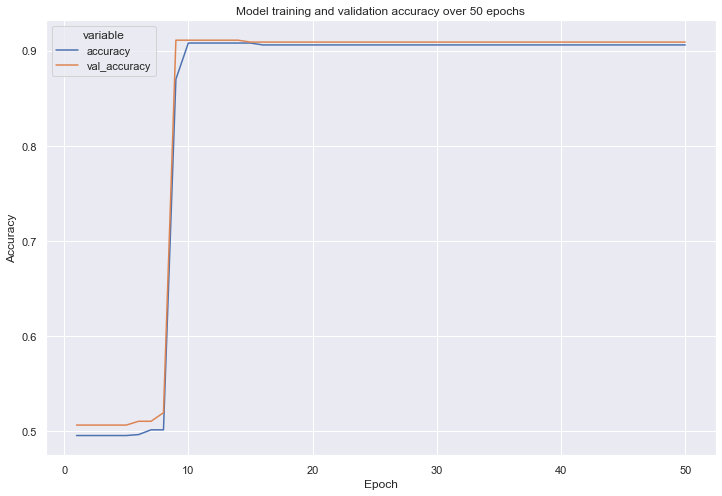

In [53]:
#Reformatting data for plotting purposes using seaborn
reLu_history_df = pd.DataFrame(reLu_history.history)
reLu_history_df['Epoch']=reLu_history_df.index+1
reLu_loss_df=pd.melt(reLu_history_df[['loss','Epoch','val_loss']],id_vars='Epoch',value_name='Loss')
reLu_accuracy_df=pd.a(reLu_history_df[['accuracy','Epoch','val_accuracy']],id_vars='Epoch',value_name='Accuracy')
p=sns.lineplot(data=reLu_accuracy_df,x='Epoch',y='Accuracy',hue='variable')
_=p.set(title="Model training and validation accuracy over 50 epochs")


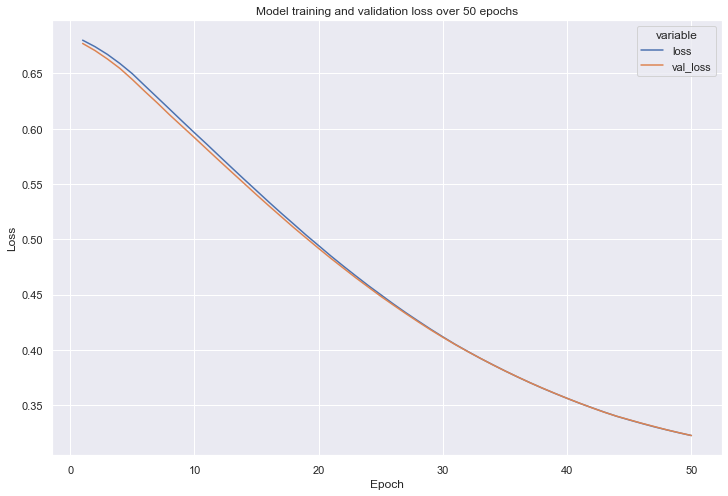

In [56]:
p=sns.lineplot(data=reLu_loss_df,x='Epoch',y='Loss',hue='variable')
_=p.set(title="Model training and validation loss over 50 epochs")


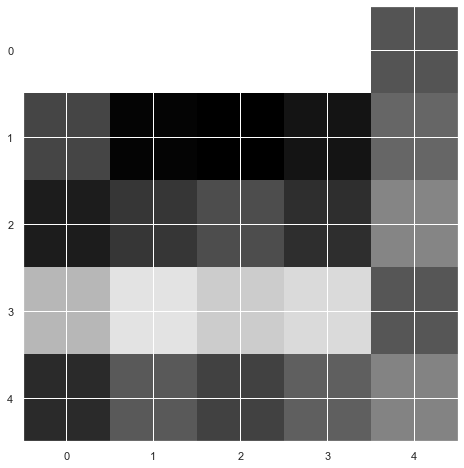

In [58]:
my_kernel=reLu_model.get_weights()[0].squeeze()
plt.figure()
plt.imshow(my_kernel,cmap="gray")

Using the reLu activation gives similar performance to the linear activation (see loss/accuracy plots). Interestingly, the reLu activation creates a convolutional kernel that highlights horizontal lines and amplifies the horizontal line signal as opposed to the vertical line signal. Ultimately, this has the same effect as the linear activation, but has the signals of horizontal lines increased as opposed to the signals of vertical lines.

In [62]:
#Build CNN model
Average_model = tf.keras.Sequential()
Average_model.add(tf.keras.layers.Conv2D(1,5,activation="linear",input_shape=(50,50,1),padding="same"))
Average_model.add(tf.keras.layers.AvgPool2D(50))
Average_model.add(tf.keras.layers.Flatten())
Average_model.add(tf.keras.layers.Dense(2,activation="softmax"))
#Compile model
Average_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
Average_history=Average_model.fit(X_train, Y_train,
validation_data=(X_val,Y_val),
batch_size=64,
epochs=50,
verbose=1,
shuffle=True)

Epoch 1/50
16/16 [==============================] - 1s 44ms/step - loss: 0.6931 - accuracy: 0.5238 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 1s 33ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 1s 32ms/step - loss: 0.6932 - accuracy: 0.4922 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 5/50
16/16 [==============================] - 1s 33ms/step - loss: 0.6931 - accuracy: 0.5092 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 1s 33ms/step - loss: 0.6931 - accuracy: 0.5093 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 1s 32ms/step - loss: 0.6931 - accuracy: 0.5145 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 8/50
16

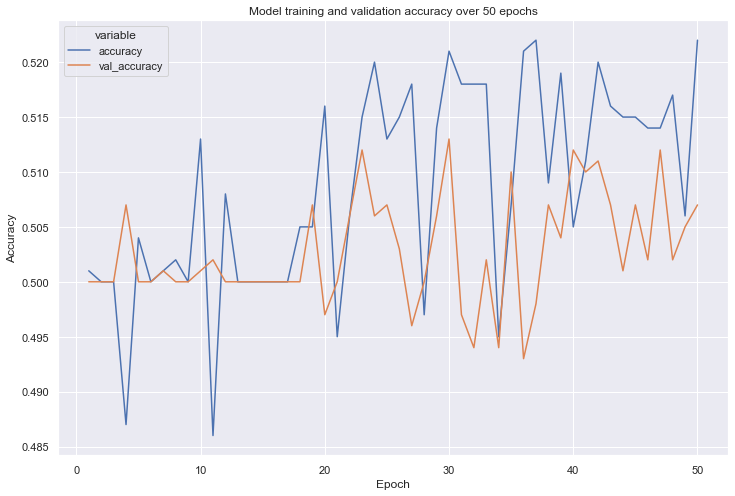

In [68]:
#Reformatting data for plotting purposes using seaborn
Average_history_df = pd.DataFrame(Average_history.history)
Average_history_df['Epoch']=Average_history_df.index+1
Average_loss_df=pd.melt(Average_history_df[['loss','Epoch','val_loss']],id_vars='Epoch',value_name='Loss')
Average_accuracy_df=pd.melt(Average_history_df[['accuracy','Epoch','val_accuracy']],id_vars='Epoch',value_name='Accuracy')
p=sns.lineplot(data=Average_accuracy_df,x='Epoch',y='Accuracy',hue='variable')
_=p.set(title="Model training and validation accuracy over 50 epochs")


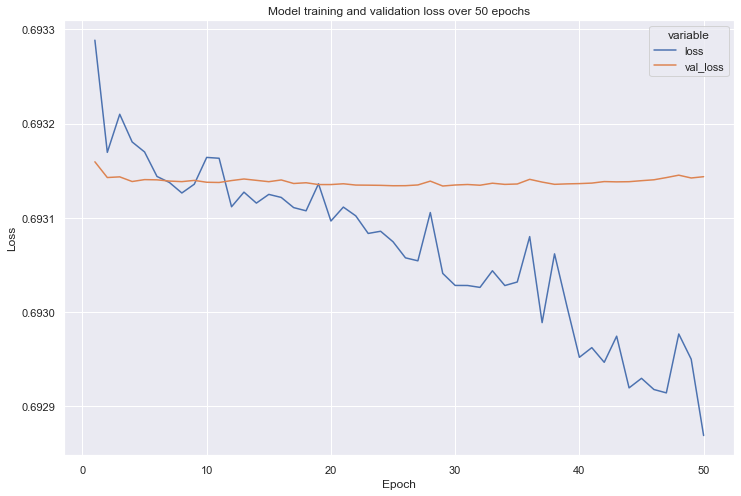

In [71]:
p=sns.lineplot(data=Average_loss_df,x='Epoch',y='Loss',hue='variable')
_=p.set(title="Model training and validation loss over 50 epochs")


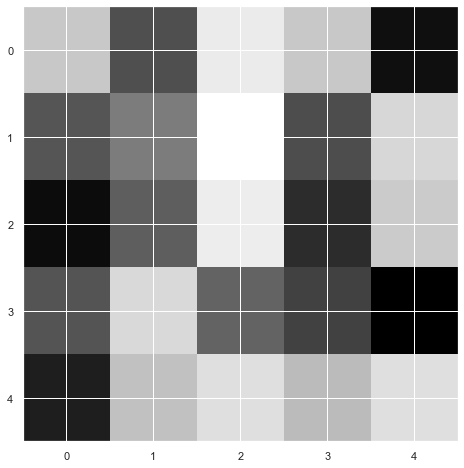

In [73]:
my_kernel=Average_model.get_weights()[0].squeeze()
plt.figure()
plt.imshow(my_kernel,cmap="gray")

Average pooling shows poor performance compared to the max pooling model. Despite the training loss decreasing, the validation loss did not decrease over the course of training. Furthermore, the accuracy for both training and validation was very unstable, suggesting that using average pooling means the model can't properly converge to a minimum. Finally, the kernel learned by the average pooling model did not seem to strongly filter for either horizontal or vertical stripes like in the max pooling and reLu models.

In [74]:
#Build CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,7,activation="linear",input_shape=(50,50,1),padding="same"))
model.add(tf.keras.layers.MaxPool2D(50))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2,activation="softmax"))
#Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
history=model.fit(X_train, Y_train,
validation_data=(X_val,Y_val),
batch_size=64,
epochs=50,
verbose=1,
shuffle=True)

Epoch 1/50
16/16 [==============================] - 2s 83ms/step - loss: 0.6440 - accuracy: 0.5089 - val_loss: 0.6302 - val_accuracy: 0.4940
Epoch 2/50
16/16 [==============================] - 1s 51ms/step - loss: 0.6184 - accuracy: 0.5170 - val_loss: 0.6076 - val_accuracy: 0.4940
Epoch 3/50
16/16 [==============================] - 1s 56ms/step - loss: 0.6017 - accuracy: 0.4961 - val_loss: 0.5862 - val_accuracy: 0.4940
Epoch 4/50
16/16 [==============================] - 1s 51ms/step - loss: 0.5746 - accuracy: 0.5062 - val_loss: 0.5675 - val_accuracy: 0.4940
Epoch 5/50
16/16 [==============================] - 1s 50ms/step - loss: 0.5391 - accuracy: 0.5362 - val_loss: 0.5511 - val_accuracy: 0.4940
Epoch 6/50
16/16 [==============================] - 1s 50ms/step - loss: 0.5465 - accuracy: 0.4971 - val_loss: 0.5347 - val_accuracy: 0.4940
Epoch 7/50
16/16 [==============================] - 1s 51ms/step - loss: 0.5244 - accuracy: 0.5096 - val_loss: 0.5181 - val_accuracy: 0.8400
Epoch 8/50
16

In [76]:
#Reformatting data for plotting purposes using seaborn
history_df = pd.DataFrame(history.history)
history_df['Epoch']=history_df.index+1
loss_df=pd.melt(history_df[['loss','Epoch','val_loss']],id_vars='Epoch',value_name='Loss')
accuracy_df=pd.melt(history_df[['accuracy','Epoch','val_accuracy']],id_vars='Epoch',value_name='Accuracy')

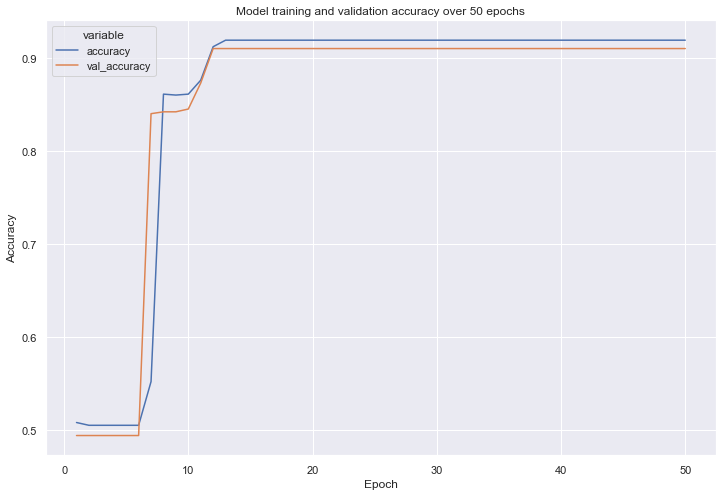

In [77]:
p=sns.lineplot(data=accuracy_df,x='Epoch',y='Accuracy',hue='variable')
_=p.set(title="Model training and validation accuracy over 50 epochs")

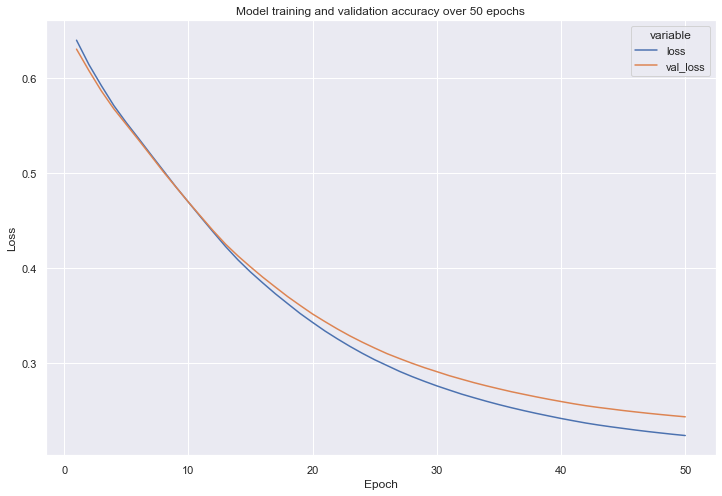

In [78]:
p=sns.lineplot(data=loss_df,x='Epoch',y='Loss',hue='variable')
_=p.set(title="Model training and validation accuracy over 50 epochs")

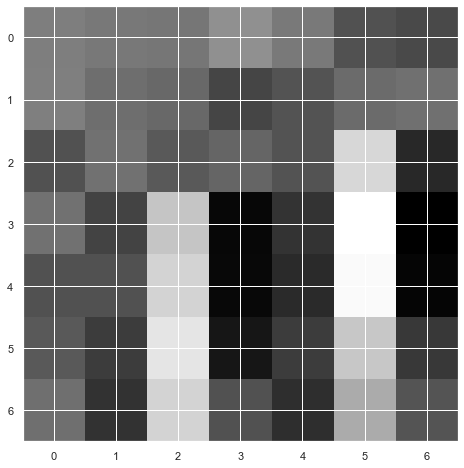

In [80]:
my_kernel=model.get_weights()[0].squeeze()
plt.figure()
plt.imshow(my_kernel,cmap="gray")

Using a 7x7 kernel shows similar performance to the original 5x5 kernel, although it does take more epochs to converge on the same level of accuracy and validation loss. The kernel itself is boosting the signal of vertical lines, similar to the original neural network model.

# Exercise 2

In [81]:
csvname = 'multiple_sine_waves.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

In [92]:
import autograd.numpy as np
from autograd import grad 
def feature_transforms(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T

def model(x,w):    
    # feature transformation 
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

def least_squares_cost(w):
    cost = np.sum((model(x,w)-y)**2)
    return cost/float(y.size)

In [83]:
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [93]:
w = np.random.randn(2,3,2)
g = lambda w: model(x,w)
max_its=2000
alpha_choice=10**(0)
w_history,cost_history=gradient_descent(least_squares_cost,alpha_choice,max_its,w)

In [87]:
parameters=w_history[np.argmin(cost_history)]

In [91]:
print('The optimal parameters are: '+str(parameters))

The optimal parameters are: [[[ 3.14159227e+00  2.72750696e-06]
  [-5.75457985e+00  3.65416127e+00]
  [-5.25143178e+00  8.17369673e+00]]

 [[ 7.50773521e-07  4.51656662e-07]
  [-1.21697646e-05 -9.99998425e-01]
  [ 1.00000691e+00 -3.21062859e-06]]]


C:\Users\nicho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Model cost over 2000 epochs'),
 Text(0, 0.5, 'Least-Squares Cost'),
 Text(0.5, 0, 'Epoch no.')]

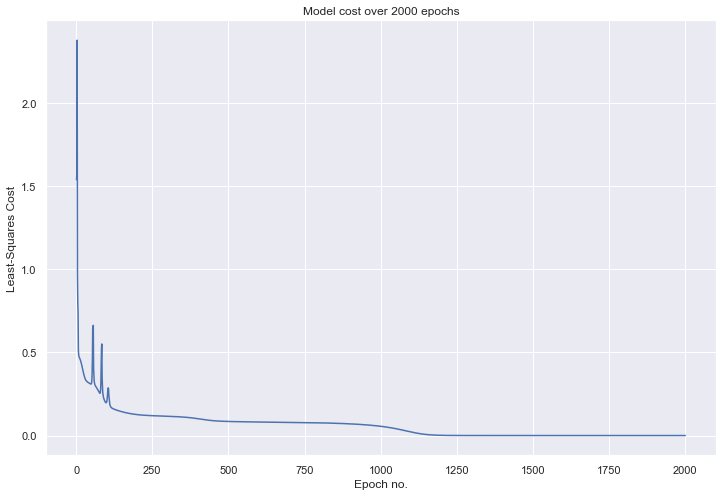

In [113]:
p=sns.lineplot([i+1 for i in range(len(cost_history))],cost_history)
p.set(title="Model cost over 2000 epochs",ylabel="Least-Squares Cost",xlabel="Epoch no.")

The above plot shows the cost function of the model of 2000 epochs. While there are some spikes in the cost function below 100 epochs, it eventually converges onto a reasonable solution with a very low cost. 

# Exercise 3

In [118]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

alphas=[1,0.5,0.1,0.01,0.001]
history_df=pd.DataFrame()
alpha=0.1
alpha_history=[]
epoch_history=[]
loss_history=[]
accuracy_history=[]
for alpha in alphas:
    model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(alpha),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history=model.fit(train_images, train_labels,
              epochs=10,
              batch_size=128,
              validation_split=0.2)
    alpha_history.extend([str(alpha)]*10)
    epoch_history.extend([i+1 for i in range(10)])
    loss_history.extend(history.history['val_loss'])
    accuracy_history.extend(history.history['val_accuracy'])

history_df=pd.DataFrame([alpha_history,epoch_history,loss_history,accuracy_history],index=['Alpha','Epoch no.','Loss','Accuracy']).T
history_df['Alpha']=history_df['Alpha'].astype(str)

Epoch 1/10
375/375 [==============================] - 7s 14ms/step - loss: 3991.8764 - accuracy: 0.4537 - val_loss: 2.5823 - val_accuracy: 0.2240
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 4.0634 - accuracy: 0.2451 - val_loss: 2.1181 - val_accuracy: 0.2724
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 2.6147 - accuracy: 0.2364 - val_loss: 2.3785 - val_accuracy: 0.2069
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 3.2263 - accuracy: 0.2070 - val_loss: 2.3105 - val_accuracy: 0.2024
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 2.4616 - accuracy: 0.2111 - val_loss: 2.4485 - val_accuracy: 0.2272
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4916 - accuracy: 0.2135 - val_loss: 2.5319 - val_accuracy: 0.2501
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4503 - accuracy: 0.2288 - val_loss: 2.1060 - val_accuracy: 0.2

In [119]:
history_df['Alpha']=history_df['Alpha'].astype(str)
history_df['Epoch no.']=history_df['Epoch no.'].astype(np.int64)
history_df['Loss']=history_df['Loss'].astype(np.float64)
history_df['Accuracy']=history_df['Accuracy'].astype(np.float64)

In [117]:
history_df

,Alpha,Epoch no.,Loss
0,1,1,2.569137
1,1,2,2.378231
2,1,3,2.114922
3,1,4,2.547562
4,1,5,2.257543
5,1,6,2.268176
6,1,7,2.076046
7,1,8,2.395300
8,1,9,1.996806
9,1,10,3.113607


<AxesSubplot:xlabel='Epoch no.', ylabel='Loss'>

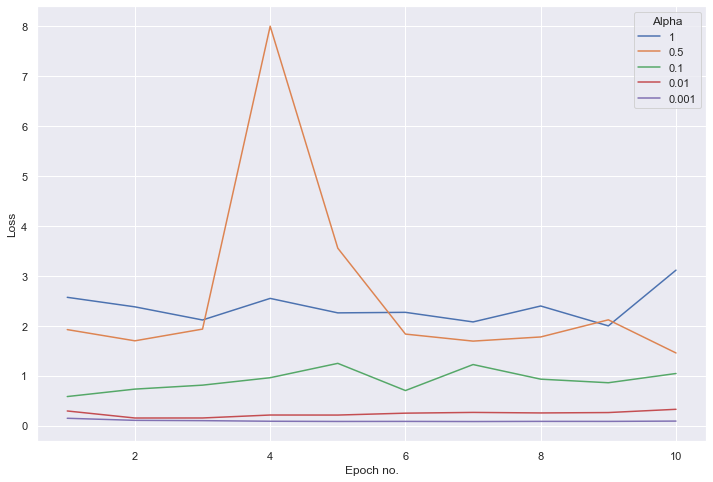

In [116]:
import seaborn as sns
sns.lineplot(data=history_df,x="Epoch no.",y="Loss",hue='Alpha')

<AxesSubplot:xlabel='Epoch no.', ylabel='Accuracy'>

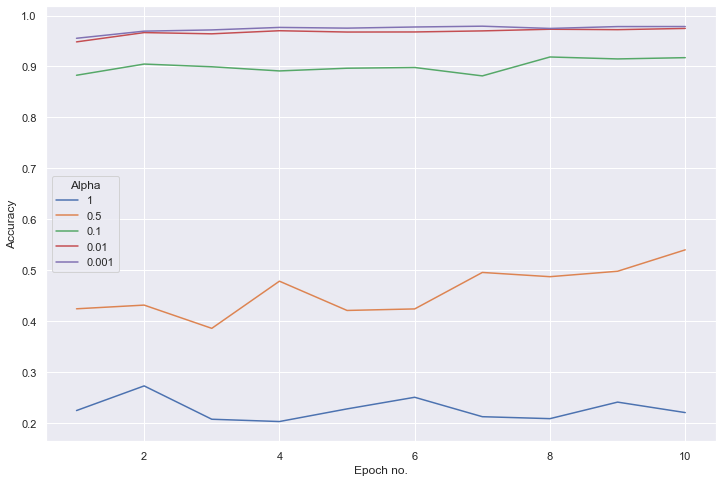

In [120]:
import seaborn as sns
sns.lineplot(data=history_df,x="Epoch no.",y="Accuracy",hue='Alpha')

The first plot shows the validation loss over time with different alphas over each epoch. The validation loss for alpha=0.001 is the lowest, which matches the validation accuracy we see as well. Overall, the performance of alpha=0.001 and alpha=0.0001 are very close, but both totally outcompete the performances where model alpha = 0.1,0.5 and 1. 

In [121]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 4s 7ms/step - loss: 1.0217 - accuracy: 0.7487 - val_loss: 0.3574 - val_accuracy: 0.9045
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3717 - accuracy: 0.9004 - val_loss: 0.3071 - val_accuracy: 0.9164
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3201 - accuracy: 0.9118 - val_loss: 0.2910 - val_accuracy: 0.9187
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2960 - accuracy: 0.9178 - val_loss: 0.2811 - val_accuracy: 0.9206
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2890 - accuracy: 0.9195 - val_loss: 0.2743 - val_accuracy: 0.9262
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2840 - accuracy: 0.9205 - val_loss: 0.2723 - val_accuracy: 0.9252
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2776 - accuracy: 0.9229 - val_loss: 0.2700 - val_accuracy: 0.9258
Epoch 

In [139]:
small_history_df=pd.DataFrame(history_small_model.history)
small_history_df['Epoch']=small_history_df.index+1
loss_df=pd.melt(small_history_df[['loss','Epoch','val_loss']],id_vars='Epoch',value_name='Loss')
sns.lineplot(data=loss_df,x='Epoch',y='Loss',hue='variable')

The above plot shows the loss for both the training and validation sets. The model begins to overfit around the 15th epoch, where the validation loss begins to increase will the training loss decreases. However, based solely on the validation loss it is more difficult to tell where overfitting begins

In [145]:
model = keras.Sequential([
  layers.Dense(96, activation='relu'),
  layers.Dense(96, activation='relu'),
  layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 5s 7ms/step - loss: 0.5895 - accuracy: 0.8391 - val_loss: 0.1878 - val_accuracy: 0.9458
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1718 - accuracy: 0.9489 - val_loss: 0.1474 - val_accuracy: 0.9553
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1233 - accuracy: 0.9635 - val_loss: 0.1139 - val_accuracy: 0.9656
Epoch 4/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.1010 - val_accuracy: 0.9685
Epoch 5/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0993 - val_accuracy: 0.9702
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.0976 - val_accuracy: 0.9718
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0453 - accuracy: 0.9866 - val_loss: 0.0959 - val_accuracy: 0.9737
Epoch 

<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

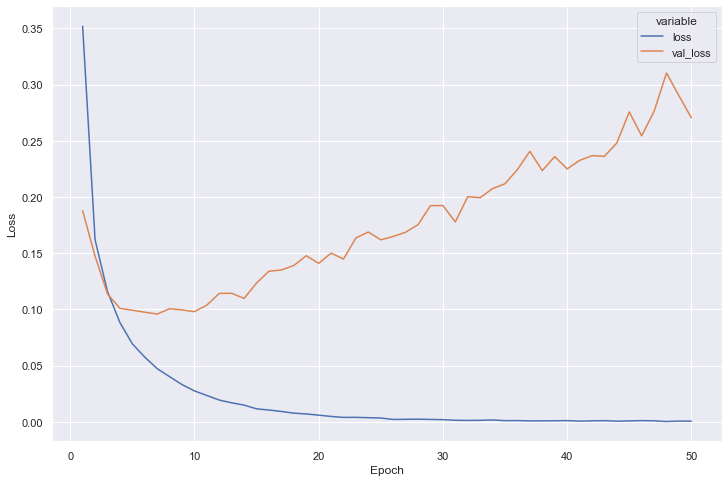

In [146]:
large_history_df=pd.DataFrame(history_large_model.history)
large_history_df['Epoch']=large_history_df.index+1
loss_df=pd.melt(large_history_df[['loss','Epoch','val_loss']],id_vars='Epoch',value_name='Loss')
sns.lineplot(data=loss_df,x='Epoch',y='Loss',hue='variable')

The above plot shows the validation and training loss for the large model. It is very clear that after 4-5 epochs, the model begins to overfit as the validation loss inreases very quickly while the training loss decreases.

# Exercise 4

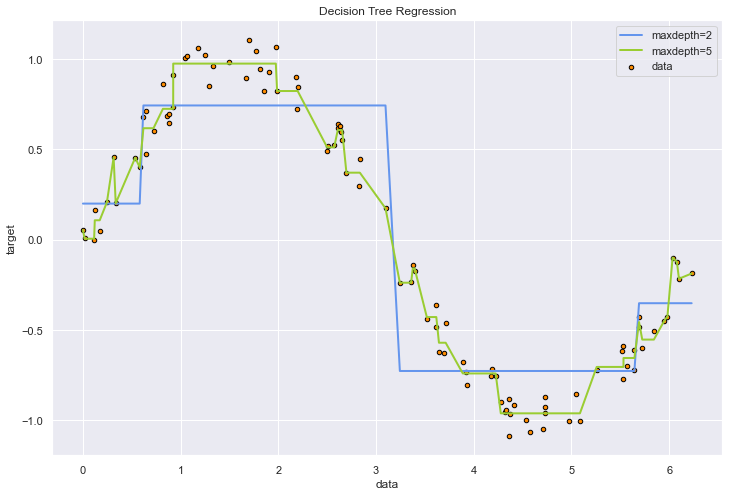

In [155]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(6.3 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += 0.3 * (0.5 - rng.rand(len(X)))
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="maxdepth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="maxdepth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [229]:
class Node():
    #The node class stores a split point, and a method for predicting the values of the left side and the right side
    #The left represents the method and same for the right side
    #If left or right is a single number, that means that the predictions for all points on that side will be set to that value
    #Otherwise left or right will be another node, that will make predictions for the left/right side values
    def __init__(self,split_point,left,right):
        self.split_point=split_point
        self.left=left
        self.right=right
    def predict(self,X):
        predictions = np.zeros(X.shape[0])
        omega_l=np.where(X<self.split_point)[0]
        omega_r=np.where(X>self.split_point)[0]
        #Make predictions for left values
        if(type(self.left) is not np.float64):
            #If this is not the final depth node/left side contains more than one value
            #Assumption is that left will thus be another node in this case
            predictions[omega_l]=self.left.predict(X[omega_l,])
        else:
            predictions[omega_l]=self.left
            
        #Make predictions for right values
        if(type(self.right) is not np.float64):
            #If this is not the final depth node/right side contains more than one value
            #Assumption is that right will thus be another node in this case
            predictions[omega_r]=self.right.predict(X[omega_r,])
        else:
            predictions[omega_r]=self.right
        
        return predictions
    
    

In [275]:
def tree_regressor(X,y,max_depth):
    def Make_Node(X,y,current_depth,max_depth):
        midpoints = (X[0:(X.shape[0]-1),]+X[1:,])/2
        costs=[get_cost(midpoint,X,y) for midpoint in midpoints]
        best_split_point = midpoints[np.argmin(costs)]
        omega_l=np.where(X<best_split_point)[0]
        omega_r=np.where(X>best_split_point)[0]
        if(len(omega_l)==1 or current_depth==max_depth):
            left = np.mean(y[omega_l])
        else:
            left = Make_Node(X[omega_l,],y[omega_l],current_depth+1,max_depth)
        if(len(omega_r)==1 or current_depth==max_depth):
            right = np.mean(y[omega_r])
        else:
            right = Make_Node(X[omega_r,],y[omega_r],current_depth+1,max_depth)
        return Node(best_split_point,left,right)
    def calculate_trapezoids(X,y,a,b):
        return np.sum(((y[0:(y.shape[0]-1)]+y[1:])/2)*(X[1:,]-X[0:(X.shape[0]-1),]))/(b-a)
        
    def get_cost(midpoint,X,y):
        omega_l=np.where(X<midpoint)[0]
        omega_r=np.where(X>midpoint)[0]
        v_l=np.mean(y[omega_l,])
        v_r=np.mean(y[omega_r,])
        return least_squares(v_l,v_r,omega_l,omega_r,y)
    def least_squares(v_l,v_r,omega_l,omega_r,y):
        left_cost=np.sum((y[omega_l]-v_l)**2)/float(len(omega_l))
        right_cost=np.sum((y[omega_r]-v_r)**2)/float(len(omega_r))
        return right_cost+left_cost
    return Make_Node(X,y,0,max_depth)

In [276]:
Decision_Tree=tree_regressor(X,y,5)
predictions=Decision_Tree.predict(X)

In [287]:
Decision_Tree.right.left.right.left.right.left

-0.6261527200076706

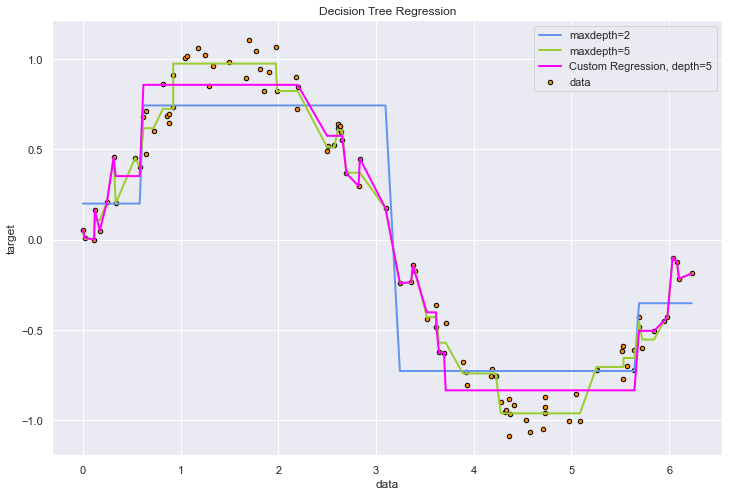

In [279]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="maxdepth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="maxdepth=5", linewidth=2)
plt.plot(X, predictions, color="magenta", label="Custom Regression, depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

The above plot shows the deision tree predictions for the 2 sklearn models, as well as my own custom decision tree regression model. Overall, both my own and the sklearn model with max depth of 5 agree on the predictions for points, although some split points do vary slightly. 